# **Tarea**

Nombre: Javiera Contador 


In [ ]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
import sklearn.metrics as sk_metrics 
# log_loss, roc_auc_score, recall_score, precision_score, 
# average_precision_score, f1_score, classification_report, 
# accuracy_score, roc_curve, precision_recall_curve, confusion_matrix
from scipy.special import expit
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
%matplotlib inline

In [ ]:
#Importar datos
df = pd.read_csv("/content/data.csv")

In [ ]:
#Visualización de las primeras 5 observaciones
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [ ]:
#Limpieza de datos
df.rename(columns = {'num       ': 'attack'}, inplace = True)
df.replace("?", np.nan, inplace = True)
df.drop(columns = ['slope', 'ca', 'thal'], inplace = True)
df.dropna(inplace= True)
df.shape

(261, 11)

### Variables que vamos a usar

    age: age in years
    sex: sex (1 = male; 0 = female)
    cp: chest pain type
    – 1: typical angina
    – 2: atypical angina
    – 3: non-anginal pain
    – 4: asymptomatic
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholesterol in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg: resting electrocardiographic results
    – 0: normal
    – 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    – 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    thalach: maximum heart rate achieved
    exang: exercise-induced angina (1 = yes; 0 = no)
    oldpeak: ST depression induced by exercise relative to rest

## Test - Train split

In [ ]:
random_seed = 123
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['attack']) 
#particionamos el conjunto de datos, donde el 20% de las observaciones son para el test y el 80% de las observaciones son para el train, 
#con una partición estratificada respecto a la variable "attack".

print("\nLa dimensión del conjunto de datos para el entrenamiento es:\n", df_train.shape)
print("\nLa dimensión del conjunto de datos para el test es:\n", df_test.shape)

print("\nPorcentajes de infartos para el train:\n", df_train['attack'].value_counts(normalize=True))
print("\nPorcentajes de infartos para el test:\n", df_test['attack'].value_counts(normalize=True))


La dimensión del conjunto de datos para el entrenamiento es:
 (208, 11)

La dimensión del conjunto de datos para el test es:
 (53, 11)

Porcentajes de infartos para el train:
 0    0.625
1    0.375
Name: attack, dtype: float64

Porcentajes de infartos para el test:
 0    0.622642
1    0.377358
Name: attack, dtype: float64


In [ ]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] #variables númericas
cat_cols = list(set(df.columns) - set(numeric_cols) - {'attack'}) #variables categoricas
cat_cols.sort()

print("Numerical var:", numeric_cols)
print("\nCategorical var:", cat_cols)

scaler = StandardScaler() 
scaler.fit(df_train[numeric_cols]) 

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['attack']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler) #obtenemos la matriz de datos para X y el vector Y del entrenamiento

Numerical var: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Categorical var: ['cp', 'exang', 'fbs', 'restecg', 'sex']


### Regresión Logistica

In [ ]:
log_model = LogisticRegression() 

log_model.fit(X, y) #para el modelo de Regresión logistica entrenamos la relación entre X e y.

LogisticRegression()

In [ ]:
# Evaluamos el modelo

In [ ]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

In [ ]:
y_score = log_model.decision_function(X_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
y_pred = log_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.8095238095238095


In [ ]:
y_pred_train = log_model.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8494


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(log_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(log_model.score(X_test, y_test)))

Training set score: 0.8494
Test set score: 0.8095


In [ ]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[23  2]
 [ 6 11]]

True Positives(TP) =  23

True Negatives(TN) =  11

False Positives(FP) =  2

False Negatives(FN) =  6


<Axes: >

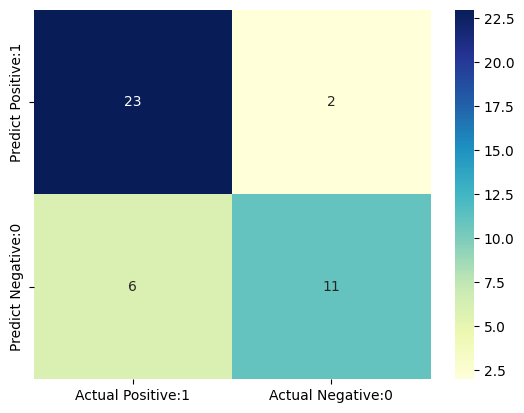

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_test, y_pred))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        25
           1       0.85      0.65      0.73        17

    accuracy                           0.81        42
   macro avg       0.82      0.78      0.79        42
weighted avg       0.81      0.81      0.80        42



In [ ]:
# accuracy de clasificación 
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8095


In [ ]:
# Error de clasificación 
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1905


In [ ]:
#Sensitivity
recall = TP / float(TP + FN)
print('Recall o Sensitivity : {0:0.4f}'.format(recall))

Recall o Sensitivity : 0.7931


In [ ]:
# Precisión 
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9200


In [ ]:
#False positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1538


In [ ]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8462


In [ ]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler) #obtenemos la matriz de datos para X_test y el vector y_test del test.

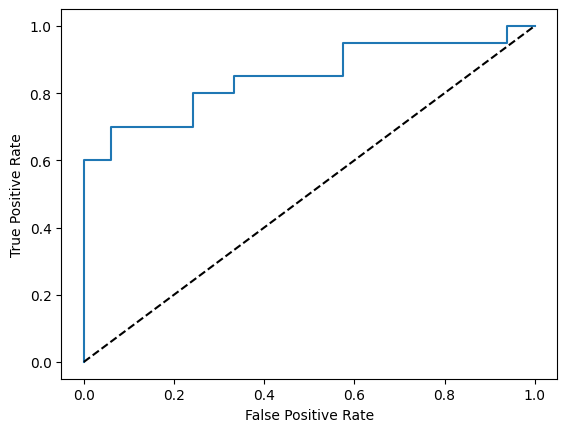

In [ ]:
#Graficamos curva ROC entre TPR y FPR
fpr, tpr, _ = sk_metrics.roc_curve(y_test, y_score, pos_label= log_model.classes_[1])
roc_display = sk_metrics.RocCurveDisplay(fpr= fpr, tpr= tpr).plot()
plt.plot([0,1], [0,1], 'k--')

<ipython-input-28-955fd06e89c8>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_values, y_values, 'bo', linestyle="--", color="black")


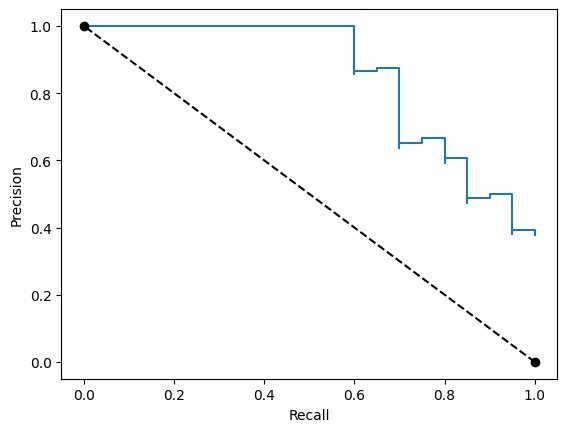

In [ ]:
#Graficamos curva ROC entre Precision-Recall o Specificity-Sensitivity
prec, recall, _ = sk_metrics.precision_recall_curve(y_test, y_score, pos_label= log_model.classes_[1])
pr_display = sk_metrics.PrecisionRecallDisplay(precision= prec, recall= recall).plot()
point1 = [1, 0]
point2 = [0, 1]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, 'bo', linestyle="--", color="black")

In [ ]:
from sklearn.metrics import roc_auc_score
auc_log = roc_auc_score(y, log_model.decision_function(X))  #Obtenemos el AUC.
auc_log

0.9184418145956608

Podemos ver que el área bajo la curva es 0.9184, lo que clasificador muy bueno.

### SVM

In [ ]:
y = df["attack"]
X = df.drop('attack',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0, stratify=df['attack'])
#particionamos X e y, donde el 20% de las observaciones son para el test y el 80% de las observaciones son para el train, 
#con una partición estratificada respecto a la variable "attack".

In [ ]:
svc =  svm.SVC(kernel='rbf', C=3) 
svc.fit(X_train, y_train) #entrenamiento con SVM, para un parámetro de regularización igual a 3 y un kernel rbf(radial basis function).

svc_predicted = svc.predict(X_test)

svc_conf_matrix = sk_metrics.confusion_matrix(y_test, svc_predicted) 
svc_acc_score = sk_metrics.accuracy_score(y_test, svc_predicted)

print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:", svc_acc_score*100,'\n')
print(sk_metrics.classification_report(y_test, svc_predicted))



confussion matrix
[[31  2]
 [12  8]]


Accuracy of Support Vector Classifier: 73.58490566037736 

              precision    recall  f1-score   support

           0       0.72      0.94      0.82        33
           1       0.80      0.40      0.53        20

    accuracy                           0.74        53
   macro avg       0.76      0.67      0.67        53
weighted avg       0.75      0.74      0.71        53



In [ ]:
y_pred_train = svc.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6827


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.6827
Test set score: 0.7358


In [ ]:
TP = svc_conf_matrix[0,0]
TN = svc_conf_matrix[1,1]
FP = svc_conf_matrix[0,1]
FN = svc_conf_matrix[1,0]

In [ ]:
# accuracy de clasificación 
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7358


In [ ]:
# Error de clasificación 
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2642


In [ ]:
#Sensitivity
recall = TP / float(TP + FN)
print('Recall o Sensitivity : {0:0.4f}'.format(recall))

Recall o Sensitivity : 0.7209


In [ ]:
# Precisión 
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9394


In [ ]:
#False positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2000


In [ ]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8000


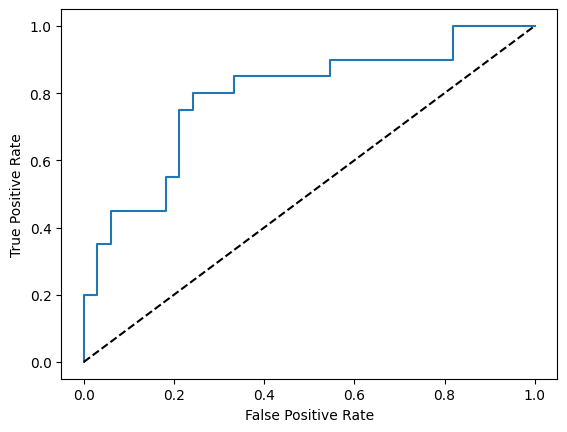

In [ ]:
y_score = svc.decision_function(X_test)

#Graficamos curva ROC entre TPR y FPR
fpr, tpr, _ = sk_metrics.roc_curve(y_test, y_score, pos_label= log_model.classes_[1])
roc_display = sk_metrics.RocCurveDisplay(fpr= fpr, tpr= tpr).plot()
plt.plot([0,1], [0,1], 'k--')

<ipython-input-43-bbbf9a669d7d>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_values, y_values, 'bo', linestyle="--", color="black")


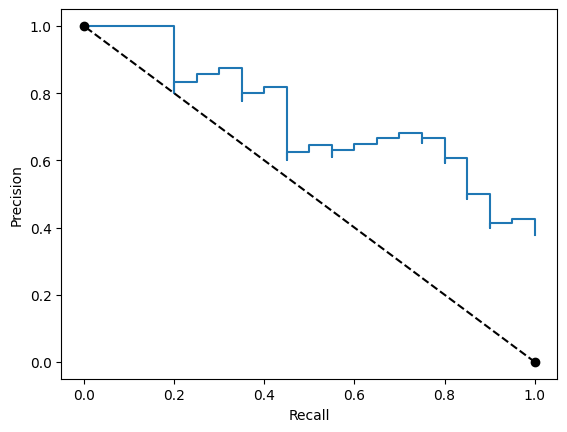

In [ ]:
#Graficamos curva ROC entre Precision-Recall o Specificity-Sensitivity
prec, recall, _ = sk_metrics.precision_recall_curve(y_test, y_score, pos_label= svc.classes_[1])
pr_display = sk_metrics.PrecisionRecallDisplay(precision= prec, recall= recall).plot()
point1 = [1, 0]
point2 = [0, 1]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, 'bo', linestyle="--", color="black")

In [ ]:
#AUC
auc_svm = roc_auc_score(y, svc.decision_function(X))
auc_svm

0.7231125579065981

Vemos que el AUC es igual a 0.7231, si comparamos el modelo de regresión logistica que tiene un AUC de 0.9184, dada esta métrica podemos decir que el modelo de regresión logistica es un mejor modelo para este conjunto de datos. 



### Naïve Bayes

In [ ]:
y = df['attack']
X = df.drop(['attack'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
#Separar X e y en test y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
#chequear dimensión de X_train y X_test
X_train.shape, X_test.shape

((182, 10), (79, 10))

In [ ]:
#Separar variables numéricas de categóricas
# Variables categóricas
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang']

In [ ]:
# Variables numéricas
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age', 'sex', 'cp', 'oldpeak']

In [ ]:
cols = X_train.columns
#Escalar variables
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
#Entrenamiento del modelo

# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import BernoulliNB

# instantiate the model
bnb = BernoulliNB()

# fit the model
bnb.fit(X_train, y_train)

BernoulliNB()

In [ ]:
#Predicción de resultados
y_pred = bnb.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
#Métrica Accuracy del modelo
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8608


In [ ]:
y_pred_train = bnb.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8297


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(bnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(bnb.score(X_test, y_test)))

Training set score: 0.8297
Test set score: 0.8608


Dado lo cercanos que son los valores, no hay overfitting.

In [ ]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[44  5]
 [ 6 24]]

True Positives(TP) =  44

True Negatives(TN) =  24

False Positives(FP) =  5

False Negatives(FN) =  6


<Axes: >

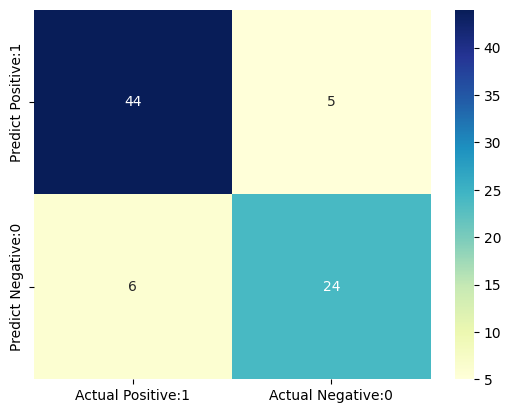

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Metricas de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        49
           1       0.83      0.80      0.81        30

    accuracy                           0.86        79
   macro avg       0.85      0.85      0.85        79
weighted avg       0.86      0.86      0.86        79



In [ ]:
# accuracy de clasificación 
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8608


In [ ]:
# Error de clasificación 
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1392


In [ ]:
# Precisión 
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8980


In [ ]:
#Sensitivity
recall = TP / float(TP + FN)
print('Recall o Sensitivity : {0:0.4f}'.format(recall))

Recall o Sensitivity : 0.8800


In [ ]:
#False positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1724


In [ ]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8276


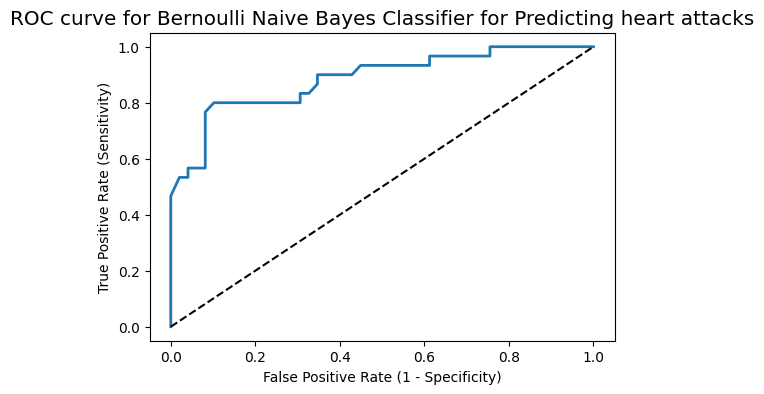

In [ ]:
# plot ROC Curve
y_pred1 = bnb.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Bernoulli Naive Bayes Classifier for Predicting heart attacks')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
#AUC
from sklearn.metrics import roc_auc_score
auc_NB = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(auc_NB))

ROC AUC : 0.8854


### LDA: Linear Discriminant Analysis

In [ ]:
# Entrenamiento del modelo LDA
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.8481012658227848


In [ ]:
y_pred_train = lda.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8242


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(lda.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lda.score(X_test, y_test)))

Training set score: 0.8242
Test set score: 0.8481


In [ ]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[44  5]
 [ 7 23]]

True Positives(TP) =  44

True Negatives(TN) =  23

False Positives(FP) =  5

False Negatives(FN) =  7


<Axes: >

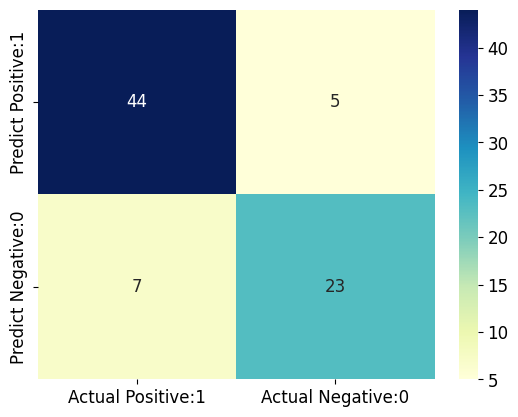

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        49
           1       0.82      0.77      0.79        30

    accuracy                           0.85        79
   macro avg       0.84      0.83      0.84        79
weighted avg       0.85      0.85      0.85        79



In [ ]:
# accuracy de clasificación 
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8608


In [ ]:
# Error de clasificación 
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1392


In [ ]:
#Sensitivity
recall = TP / float(TP + FN)
print('Recall o Sensitivity : {0:0.4f}'.format(recall))

Recall o Sensitivity : 0.8800


In [ ]:
# Precisión 
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8980


In [ ]:
#False positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1724


In [ ]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8276


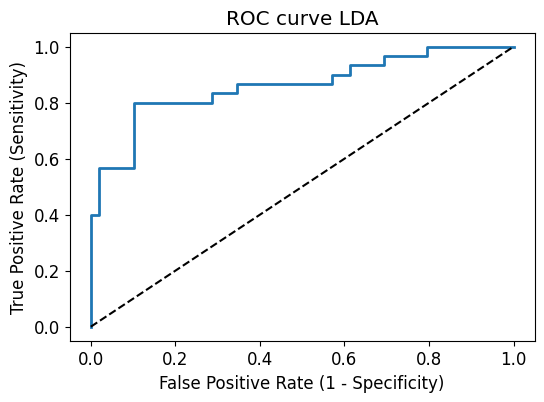

In [ ]:
# plot ROC Curve
y_pred1 = lda.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve LDA')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
#auc
auc_lda = roc_auc_score(y_test, y_pred1)
auc_lda

0.8625850340136054

### QDA: Quadratic Discriminant Analysis

In [ ]:
#Separar variable objetivo
y = df['attack']
X = df.drop(['attack'], axis=1)

In [ ]:
#Separar X e y en test y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
#chequear dimensión de X_train y X_test
X_train.shape, X_test.shape

((182, 10), (79, 10))

In [ ]:
# Variables categóricas
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang']

In [ ]:
# Variables numéricas
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age', 'sex', 'cp', 'oldpeak']

In [ ]:
cols = X_train.columns

In [ ]:
#Escalar modelo
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
# Creamos un clasificador de análisis discriminante cuadrático (QDA)
qda = QuadraticDiscriminantAnalysis()

# Ajustamos el clasificador con los datos de entrenamiento
qda.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = qda.predict(X_test)

In [ ]:
# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.810126582278481


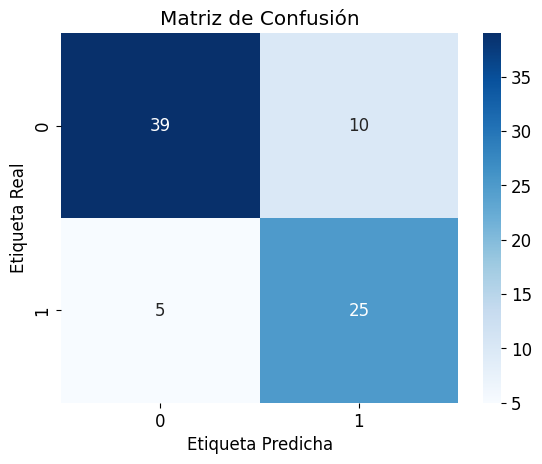

In [ ]:
# Calculamos y mostramos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

In [ ]:
#Calculamos las probabilidades de predicción de cada clase utilizando el método predict_proba del clasificador QDA:
probas = qda.predict_proba(X_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])

In [ ]:
#Calculamos el valor de AUC
auc_qda = roc_auc_score(y_test, probas[:, 1])
print("AUC:", auc_qda)

AUC: 0.8496598639455782


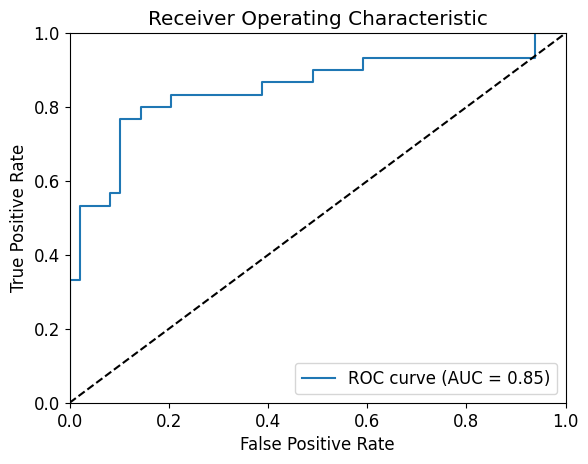

In [ ]:
#Realizamos la gráfica de la curva ROC
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_qda)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Conclusiones

In [ ]:
print('AUC Regresión logistica: {:.4f}'.format(auc_log))
print('AUC SVM: {:.4f}'.format(auc_svm))
print('AUC Naive Bayes: {:.4f}'.format(auc_NB))
print('AUC LDA: {:.4f}'.format(auc_lda))
print('AUC QDA: {:.4f}'.format(auc_qda))

AUC Regresión logistica: 0.9184
AUC SVM: 0.7231
AUC Naive Bayes: 0.8854
AUC LDA: 0.8626
AUC QDA: 0.8497


Dados los diferentes AUC de cada modelo, podemos concluir que el mejor modelo para este conjunto de datos es el modelo de regresión logistica con un AUC de 0.9184.